# <b>Conducting Exploratory Data Analysis Using YData Profiling</b>:
###<b>Behavioural Risk Factor Surveillance System Standardized Questionnaire </b>

The Behavioural Risk Factor Surveillance System (BRFSS) consists of a standardized core questionnaire that all states are obligated to conduct, in addition to a series of optional modules and state-added questions. Here, exploratory data analysis will be conducted on the standardized core questionnaire specifically.

In [1]:
%pip install ydata-profiling

^C
Note: you may need to restart the kernel to use updated packages.


  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/33/85/45027914eb485482976883dcaab434eab99f1ed5cb222781e7ba46bdf3b7/ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scipy<1.14,>=1.4.1 from https://files.pythonhosted.org/packages/3e/df/963384e90733e08eac978cd103c34df181d1fec424de383cdc443f418dd4/scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
  Obtaining dependency information for pandas!=1.4.0,<3,>1.1 from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information fo


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install setuptools

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/de/88/70c5767a0e43eb4451c2200f07d042a4bcd7639276003a9c54a68cfcc1f8/setuptools-70.0.0-py3-none-any.whl.metadata
  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

c:\Users\Laura Cramm\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
#Reading the csv file containing the standardized core BRFSS data and saving
#it to a pandas data frame
brfssCore = pd.read_csv(r"C:\Users\Laura Cramm\Documents\TMU 2024\CIND 820\3. Initial Results\EDA\CoreSurvey.csv")

In [10]:
#The COVIDPOS variable represents the answer to the question: "Has a doctor,
#nurse, or other health professional ever told you that you tested positive for COVID 19"
#A value of 1 represents a "Yes", 2 represents a "No", and 3 represents "Tested positive
#using home test without health professional". All other values indicate missing data.

#Converting the COVIDPOS variable to a Boolean, where 1 and 3 are equivalent to 'True'
#and 2 is equivalent to 'False'
brfssCore['COVIDPOS'] = brfssCore['COVIDPOS'] = np.select([np.logical_or(brfssCore['COVIDPOS'] == 1, brfssCore['COVIDPOS'] == 3), (brfssCore['COVIDPOS'] == 2)],
                                  [True, False], default=None)

In [11]:
#Removing all individuals who never tested positive for COIVD-19 (or had a missing
#value for the COVIDPOS variable) from the data frame.
brfssCore = brfssCore[(brfssCore["COVIDPOS"] == True)]

In [12]:
#The MENTHLTH variable represents the answer to the question:
#"Now thinking about your mental health, which includes stress, depression, and problems with emotions,
#for how many days during the past 30 days was your mental health not good?"
#This key outcome variable will be dichotomized, with 14 or more days
#indicating frequent mental distress.
brfssCore['MENTHLTH'] = np.select([np.logical_or(brfssCore['MENTHLTH'] == 88, brfssCore['MENTHLTH']<14), np.logical_or(brfssCore['MENTHLTH'] == 77, brfssCore['MENTHLTH'] == 99)],
                                  [False, None], default=True)


In [13]:
#Removing the underscore from the _STATE attribute name.
brfssCore.rename(columns={'_STATE': 'STATE'}, inplace=True)

#Removing the underscore from the _BMI5CAT attribute name.
brfssCore.rename(columns={'_BMI5CAT': 'BMI5CAT'}, inplace=True)

#Removing the underscore from the _SMOKER3 attribute name
brfssCore.rename(columns={'_SMOKER3': 'SMOKER3'}, inplace=True)

#Sorting the attribute names alphabetically.
brfssCore = brfssCore.sort_index(axis=1)

#Attributes that start with an underscore were calculated by the CDC staff using other attributes.
#Removing these attributes
brfssCore = brfssCore.drop(brfssCore.loc[:, '_AIDTST4':'_YRSSMOK'].columns, axis=1)
brfssCore = brfssCore.drop(['ALCDAY4', 'WEIGHT2', 'HEIGHT3', 'HTIN4'], axis=1)

In [14]:
#Converting dichotomous categorical variables to Booleans
#1 is YES, 2 is NO, otherwise MISSING
for col in ['CTELENM1', 'PVTRESD1', 'CELPHON1', 'LADULT1', 'CTELNUM1', 'PVTRESD3',
            'CSTATE1', 'RESPSLCT', 'LANDLINE', 'MEDCOST1', 'EXERANY2', 'CVDINFR4',
            'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1',
            'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'NUMHHOL4', 'VETERAN3',
            'PREGNANT', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES',
            'DIFFALON', 'HADMAM', 'CERVSCRN', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2',
            'HADSIGM4', 'COLNCNCR', 'VIRCOLO1', 'SMALSTOL', 'STOOLDN2', 'BLDSTFIT',
            'SMOKE100', 'LCSCTSC1', 'LCSSCNCR', 'FLUSHOT7', 'PNEUVAC4', 'HIVTST7',
            'HIVRISK5', 'COVIDSMP', 'INSULIN1', 'FEETSORE', 'SHINGLE2', 'COVIDVA1',
            'COPDCOGH', 'COPDFLEM', 'COPDBRTH', 'COPDBTST', 'CSRVSUM', 'CSRVRTRN',
            'CSRVINST', 'CSRVINSR', 'CSRVDEIN', 'CSRVCLIN', 'CSRVPAIN', 'PSATEST1',
            'CIMEMLOS', 'CDDISCUS', 'CRGVALZD', 'CRGVPER1', 'CRGVHOU1', 'CRGVEXPT',
            'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'SDHEMPLY',
            'FOODSTMP', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'MARJSMOK', 'MARJEAT',
            'MARJVAPE', 'MARJDAB', 'MARJOTHR', 'STOPSMK2', 'MENTCIGS', 'MENTECIG',
            'HEATTBCO', 'ASBIALCH', 'ASBIDRNK', 'ASBIBING', 'ASBIADVC', 'ASBIRDUC',
            'FIREARM5', 'GUNLOAD', 'LOADULK2', 'CASTHDX2', 'CASTHNO2', 'HADSEX',
            'PFPPRVN4', 'RRPHYSM2', 'HPVADVC4', 'DRNKANY6', 'CAREGIV1']:
  brfssCore[col] = np.select([(brfssCore[col] == 1), (brfssCore[col] == 2)],
                                  [True, False], default=None)

#Sex is coded as a dichtomous variable, where 1=Male and 2=Female.
#Converting to a boolean variable where Female=True and Male=False
brfssCore['SEXVAR'] = np.select([(brfssCore['SEXVAR'] == 2), (brfssCore['SEXVAR'] == 1)],
                                  [True, False], default=None)

In [15]:
#Converting dichotomous categorical variables to Booleans. In this case,
#the variables are either True or have a missing value.
#1 is YES, Otherwise is MISSING
for col in ['COLGHOUS', 'STATERE1', 'SAFETIME', 'CELLFON5', 'CADULT1','CCLGHOUS']:
  brfssCore[col] = np.where((brfssCore[col] == 1), True, None)

In [16]:
#The following variables are numeric, but have multiple values that indicate
#a missing observation. For example, the 'HHADULT' variable represents the
#number of adults in the household. A value of 88, 77, or 99 indicates missing data.

#Altering numeric variables so that only a value of 'None' indicates missing data.
brfssCore['HHADULT'] = np.where(np.logical_or(brfssCore['HHADULT'] == 77, brfssCore['HHADULT'] == 88, brfssCore['HHADULT'] == 99), None, brfssCore['HHADULT'])

for col in ['POORHLTH', 'AVEDRNK3', 'DRNK3GE5', 'COPDSMOK', 'MARIJAN1', 'PHYSHLTH']:
  brfssCore[col] = np.select([(brfssCore[col] == 88), np.logical_or(brfssCore[col] == 77, brfssCore[col] == 99)],
                                  [0, None], default=brfssCore[col])


for col in ['SLEPTIM1', 'MAXDRNKS']:
  brfssCore[col] = np.where(np.logical_or(brfssCore[col] == 77, brfssCore[col] == 99), None, brfssCore[col])

brfssCore['CHILDREN'] = np.select([(brfssCore['CHILDREN'] == 88), (brfssCore['CHILDREN'] == 99)],
                                  [0, None], default=brfssCore['CHILDREN'])


brfssCore['LCSFIRST'] = np.where(np.logical_or(brfssCore['LCSFIRST'] == 777, brfssCore['LCSFIRST'] == 888, brfssCore['LCSFIRST'] == 999), None, brfssCore['LCSFIRST'])


for col in ['LCSLAST', 'LCSNUMCG']:
  brfssCore[col] = np.where(np.logical_or(brfssCore[col] == 777, brfssCore[col] == 999), None, brfssCore[col])


brfssCore['CHKHEMO3'] = np.select([np.logical_or(brfssCore['CHKHEMO3'] == 88, brfssCore['CHKHEMO3'] == 98), np.logical_or(brfssCore['CHKHEMO3'] == 77, brfssCore['CHKHEMO3'] == 99)],
                                  [0, None], default=brfssCore['CHKHEMO3'])


brfssCore['CNCRAGE'] = np.where(np.logical_or(brfssCore['CNCRAGE'] == 98, brfssCore['CNCRAGE'] == 99), None, brfssCore['CNCRAGE'])

brfssCore['DROCDY4_'] = np.where((brfssCore['DROCDY4_'] == 900), None, brfssCore['DROCDY4_'])


In [17]:
#The following variables are ordinal, but also have multiple values that indicate
#missing data. Altering these variables so that only a value of 'None' indicates missing data.

for col in ['GENHLTH','COLNTES1', 'SIGMTES1', 'LASTSIG4', 'VCLNTES2', 'STOLTEST', 'SDNATES1',
            'SMOKDAY2', 'USENOW3',  'ECIGNOW2',  'LCSCTWHN',  'TETANUS1', 'PERSDOC3',
            'DIABETE4', 'HOWLONG', 'CRVCLCNC', 'PREDIAB2', 'COVACGET',  'COVIDNU1',
            'COVIDINT', 'CNCRDIFF', 'CSRVCTL2', 'PSATIME1', 'CDHOUSE',   'CDASSIST',
            'CDHELP',   'CDSOCIAL', 'CRGVLNG1',  'CRGVHRS1', 'ACEPUNCH', 'ACEHURT1',
            'ACESWEAR',   'ACETOUCH',  'ACETTHEM', 'ACEHVSEX',  'ACEADSAF',   'ACEADNED',
            'LSATISFY',  'EMTSUPRT',   'SDHISOLT',    'SDHFOOD1',   'SDHSTRE1',   'RRCOGNT2',
            'RRTREAT',  'RRATWRK2']:
            brfssCore[col] = np.where(np.logical_or(brfssCore[col] == 7, brfssCore[col] == 9), None, brfssCore[col])



brfssCore['CHECKUP1'] = np.where(np.logical_or(brfssCore['CHECKUP1'] == 7, brfssCore['CHECKUP1'] == 8, brfssCore['CHECKUP1'] == 9), None, brfssCore['CHECKUP1'])

A = np.logical_or(brfssCore['LASTDEN4'] == 5, brfssCore['LASTDEN4'] == 7)
B = np.logical_or(brfssCore['LASTDEN4'] == 8, brfssCore['LASTDEN4'] == 9)
brfssCore['LASTDEN4'] = np.where(np.logical_or(A, B), None, brfssCore['LASTDEN4'])


for col in ['RMVTETH4', 'PDIABTS1', 'EYEEXAM1', 'DIABEYE1', 'DIABEDU1' ]:
  brfssCore[col] = np.select([(brfssCore[col] == 8), np.logical_or(brfssCore[col] == 7, brfssCore[col] == 9)],
                                  [0, None], default=brfssCore[col])

for col in ['SMOKER3', 'EDUCA']:
  brfssCore[col] = np.where((brfssCore[col] == 9), None, brfssCore[col])

for col in ['INCOME3', 'HPVADSHT', 'LASTSMK2']:
  brfssCore[col] = np.where(np.logical_or(brfssCore[col] == 77, brfssCore[col] == 99), None, brfssCore[col])

brfssCore['RRHCARE4'] = np.where(np.logical_or(brfssCore['RRHCARE4'] == 6, brfssCore['RRHCARE4'] == 7, brfssCore['RRHCARE4'] == 9), None, brfssCore['RRHCARE4'])


brfssCore['_AGEG5YR'] = np.where((brfssCore['_AGEG5YR'] == 14), None, brfssCore['_AGEG5YR'])

brfssCore['_AGE65YR'] = np.where((brfssCore['_AGE65YR'] == 3), None, brfssCore['_AGE65YR'])


#Using the .astype() function to give ordinal variables the 'category' data type
for col in ['GENHLTH','COLNTES1', 'SIGMTES1', 'LASTSIG4', 'VCLNTES2', 'STOLTEST', 'SDNATES1',
            'SMOKDAY2', 'USENOW3',  'ECIGNOW2',  'LCSCTWHN',  'TETANUS1', 'PERSDOC3',
            'DIABETE4', 'HOWLONG', 'CRVCLCNC', 'PREDIAB2', 'COVACGET',  'COVIDNU1',
            'COVIDINT', 'CNCRDIFF', 'CSRVCTL2', 'PSATIME1', 'CDHOUSE',   'CDASSIST',
            'CDHELP',   'CDSOCIAL', 'CRGVLNG1',  'CRGVHRS1', 'ACEPUNCH', 'ACEHURT1',
            'ACESWEAR',   'ACETOUCH',  'ACETTHEM', 'ACEHVSEX',  'ACEADSAF',   'ACEADNED',
            'LSATISFY',  'EMTSUPRT',   'SDHISOLT',    'SDHFOOD1',   'SDHSTRE1',   'RRCOGNT2',
            'RRTREAT',  'RRATWRK2', 'CHECKUP1', 'LASTDEN4', 'RMVTETH4', 'PDIABTS1', 'EYEEXAM1', 'DIABEYE1', 'DIABEDU1',
            'EDUCA', 'INCOME3', 'HPVADSHT', 'LASTSMK2', 'RRHCARE4', '_AGEG5YR', '_AGE65YR',  'BMI5CAT', 'SMOKER3' ]:
    brfssCore[col] = brfssCore[col].astype('category')

In [18]:
#These variables are nominal; dummy variables will be created using
#one-hot encoding.
for col in ['STATE', 'FMONTH','IMONTH','SEXVAR', 'QSTVER','QSTLANG','MSCODE']:
  brfssCore = pd.concat([brfssCore, pd.get_dummies(brfssCore[col], prefix=col)], axis=1)

#First altering these variables so that only a value of 'None' indicates missing data.
brfssCore['IDAY'] = np.where((brfssCore['IDAY'] == 0), None, brfssCore['IDAY'])

brfssCore['LANDSEX1'] = np.where(np.logical_or(brfssCore['LANDSEX1'] == 0, brfssCore['LANDSEX1'] == 7, brfssCore['LANDSEX1'] == 9), None, brfssCore['LANDSEX1'])

for col in ['CELLSEX1', 'RENTHOM1', 'COLNSIGM', 'DIABTYPE', 'CSRVTRT3',
            'PCPSARS2', 'PSASUGST', 'PCSTALK1', 'RCSXBRTH', 'RCSRLTN2','BIRTHSEX',
            'SOMALE', 'SOFEMALE', 'TRNSGNDR']:
            brfssCore[col] = np.where(np.logical_or(brfssCore[col] == 7, brfssCore[col] == 9), None, brfssCore[col])

brfssCore['PRIMINSR'] = np.select([(brfssCore['PRIMINSR'] == 88), np.logical_or(brfssCore['PRIMINSR'] == 77, brfssCore['PRIMINSR'] == 99)],
                                  [0, None], default=brfssCore['PRIMINSR'])


for col in ['MARITAL', 'EMPLOY1', 'RCSGEND1']:
  brfssCore[col] = np.where((brfssCore[col] == 9), None, brfssCore[col])


for col in ['COVIDPRM','IMFVPLA3','CNCRTYP2','CSRVDOC1', 'CRGVREL4',
            'CRGVPRB3', 'TYPCNTR9','BRTHCNT4','WHEREGET', 'NOBCUSE8',
            'BCPREFER','RRCLASS3']:
            brfssCore[col] = np.where(np.logical_or(brfssCore[col] == 77, brfssCore[col] == 99), None, brfssCore[col])

#Generating dummy variables
for col in ['IDAY', 'LANDSEX1', 'CELLSEX1', 'RENTHOM1', 'COLNSIGM', 'DIABTYPE', 'CSRVTRT3',
            'PCPSARS2', 'PSASUGST', 'PCSTALK1', 'RCSXBRTH', 'RCSRLTN2','BIRTHSEX',
            'SOMALE', 'SOFEMALE', 'TRNSGNDR', 'PRIMINSR',  'MARITAL', 'EMPLOY1', 'RCSGEND1', 'COVIDPRM','IMFVPLA3','CNCRTYP2','CSRVDOC1', 'CRGVREL4',
            'CRGVPRB3', 'TYPCNTR9','BRTHCNT4','WHEREGET', 'NOBCUSE8',
            'BCPREFER','RRCLASS3']:
  brfssCore = pd.concat([brfssCore, pd.get_dummies(brfssCore[col], prefix=col)], axis=1)

In [19]:
from datetime import datetime

In [20]:
#These variables represent dates. Processing is required to convert these
#variables to date objects.

for col in ['FLSHTMY3', 'HIVTSTD3','COVIDFS1', 'COVIDSE1']:
#Converting to a string object
  brfssCore[col] = brfssCore[col].astype('string')
#Removing decimal places
  brfssCore[col] = brfssCore[col].str.replace('.0', '')
#If string is null, replacing with '-1'
  brfssCore[col] = np.where((brfssCore[col].isnull()), '-1', brfssCore[col])

In [21]:
#Adding preceding zero if the month is only one digit (Ex. 1 to 01)
for col in ['FLSHTMY3', 'HIVTSTD3','COVIDFS1', 'COVIDSE1']:
  for i in range(len(brfssCore[col])):
    if len(brfssCore.loc[brfssCore.index[i], col]) == 5:
      brfssCore.loc[brfssCore.index[i], col] = '0' + brfssCore.loc[brfssCore.index[i], col]

In [22]:
#Some additional values represent a null value; setting to None
for col in ['FLSHTMY3', 'HIVTSTD3','COVIDFS1', 'COVIDSE1']:
  for i in range(len(brfssCore[col])):
    if np.logical_or(brfssCore.loc[brfssCore.index[i], col].endswith('7777'),
                     brfssCore.loc[brfssCore.index[i], col].endswith('9999'), ):

      brfssCore.loc[brfssCore.index[i], col] = None

In [23]:
#Converting all None values to '052024' (which doesn't otherwise appear in dataset)
for col in ['FLSHTMY3', 'HIVTSTD3','COVIDFS1', 'COVIDSE1']:
  for i in range(len(brfssCore[col])):
    if brfssCore.loc[brfssCore.index[i], col] == '-1':
      brfssCore.loc[brfssCore.index[i], col] = None
    if brfssCore.loc[brfssCore.index[i], col] == None:
      brfssCore.loc[brfssCore.index[i], col] = "052024"

In [24]:
#Converting strings to datetime objects using the strptime() function
for col in ['FLSHTMY3', 'HIVTSTD3','COVIDFS1', 'COVIDSE1']:
  for i in range(len(brfssCore[col])):
    #If month is missing, only extract year
    if np.logical_or(brfssCore.loc[brfssCore.index[i], col].startswith('77'),
                     brfssCore.loc[brfssCore.index[i], col].startswith('99'), ):
      brfssCore.loc[brfssCore.index[i], col] =brfssCore.loc[brfssCore.index[i], col][2:]
      brfssCore.loc[brfssCore.index[i], col] = datetime.strptime(brfssCore.loc[brfssCore.index[i], col], '%Y')
    else:
      #Otherwise format is mmYYYY
       brfssCore.loc[brfssCore.index[i], col] = datetime.strptime(brfssCore.loc[brfssCore.index[i], col], '%m%Y')

In [25]:
#Converting observations that were originally missing back to None values
#(the strptime() function cannot handle null values, so a temporary placeholder
#was necessary)
for col in ['FLSHTMY3', 'HIVTSTD3','COVIDFS1', 'COVIDSE1']:
  for i in range(len(brfssCore[col])):
    if brfssCore.loc[brfssCore.index[i], col].year ==2024:
      brfssCore.loc[brfssCore.index[i], col] = None

In [26]:
#'IDATE' (interview date) also needs to be converted to a date object
#but it has a different format than the preceding date variables (mmddYYY vs. mmYYYY)

#Converting to a string object
brfssCore['IDATE'] = brfssCore['IDATE'].astype('string')
#Removing decimal places
brfssCore['IDATE'] = brfssCore['IDATE'].str.replace('.0', '')

In [27]:
#Adding preceding zero if the day is only one digit (Ex. 1 to 01)
for i in range(len(brfssCore['IDATE'])):
  if len(brfssCore.loc[brfssCore.index[i], 'IDATE']) == 7:
    brfssCore.loc[brfssCore.index[i], 'IDATE'] = '0' + brfssCore.loc[brfssCore.index[i], 'IDATE']

In [28]:
#Converting strings to datetime objects
for i in range(len(brfssCore['IDATE'])):
    brfssCore.loc[brfssCore.index[i], 'INTERVIEWDATE'] = datetime.strptime(brfssCore.loc[brfssCore.index[i], 'IDATE'], '%m%d%Y')

In [29]:
brfssCore = brfssCore.drop(['IDATE'], axis=1)

In [30]:
#Using the ydata_profiling library to generate an exploratory data analysis report
edaCore = ProfileReport(brfssCore, title="Exploratory Data Analysis")

In [31]:
#Saving this exploratory data analysis report to an .html file.
edaCore.to_file(r"C:\Users\Laura Cramm\Documents\TMU 2024\CIND 820\3. Initial Results\EDA\exploratory_data_analysis_core_modules.html")

Summarize dataset:   2%|▏         | 12/626 [00:00<00:25, 23.62it/s, Describe variable:ASBIDRNK]c:\Users\Laura Cramm\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
Summarize dataset:   2%|▏         | 12/626 [00:00<00:25, 23.62it/s, Describe variable:ASBIBING]c:\Users\Laura Cramm\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [ ]:
brfssCore['_AGEG5YR'].value_counts()

_AGEG5YR
9     11705
10    11002
7     10906
8     10834
5     10565
4     10189
6      9775
1      9754
3      9311
11     8869
2      8218
12     6045
13     5452
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

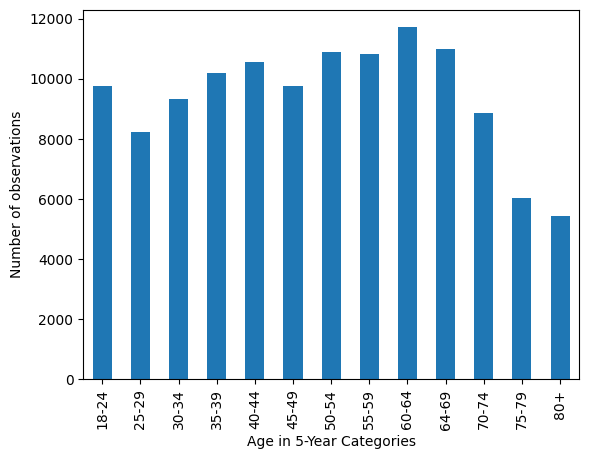

In [ ]:
brfssCore['_AGEG5YR'].value_counts(sort=False).plot(kind="bar")
labels = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64",
          "64-69", "70-74", "75-79", "80+"]
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.xticks(x, labels)

plt.xlabel('Age in 5-Year Categories')
plt.ylabel('Number of observations')
plt.savefig('Age.pdf')

In [32]:
brfssCore.to_csv(r'C:\Users\Laura Cramm\Documents\TMU 2024\CIND 820\3. Initial Results\Initial Data.csv')

In [34]:
brfssCore.to_pickle(r'C:\Users\Laura Cramm\Documents\TMU 2024\CIND 820\3. Initial Results\EDA\brfss.pickle') 